In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = "raw_data/"
PATH_OUT = "preprocessed_data/"

## Data Cleaning and Preparation
Johns Hopkins CSSE's global confirmed cases data is organized by Country/Region. In particular, the data for Australia, Canada, and China is reported at the province level. Let's aggregate all global confirmed cases and deaths data by country only. 

### Global Confirmed Case Count

In [2]:
timeseries_confirmed_df = pd.read_csv(PATH_IN + "time_series_covid19_confirmed_global.csv")

# Create new file aggregating confirmed case count by country instead of by "Country/Region"
fout = open(PATH_OUT + "time_series_covid19_confirmed_by_country.csv",'w')
fout.write("Country")
dates = timeseries_confirmed_df.columns[4:]

for date in dates:
    fout.write("," + date)
fout.write("\n")

countries = list(timeseries_confirmed_df["Country/Region"].value_counts().index)
for country in countries:
    if "," in country:
        fout.write("\"" + country + "\"")
    else:
        fout.write(country)
    for date in dates:
        count = np.sum(np.array(timeseries_confirmed_df.set_index("Country/Region").loc[country, date]))
        fout.write("," + str(count))
    fout.write("\n")
fout.close()

### Global Death Toll

In [3]:
### Construct time series `dataframe` for deaths by country

timeseries_deaths_df = pd.read_csv(PATH_IN + "time_series_covid19_deaths_global.csv")

# Create new file aggregating confirmed case count by country instead of by "Country/Region"
fout = open(PATH_OUT + "time_series_covid19_deaths_by_country.csv",'w')
fout.write("Country")
dates = timeseries_deaths_df.columns[4:]
print(dates)

for date in dates:
    fout.write("," + date)
fout.write("\n")

countries = list(timeseries_deaths_df["Country/Region"].value_counts().index)

for country in countries:
    if "," in country:
        fout.write("\"" + country + "\"")
    else:
        fout.write(country)
    for date in dates:
        count = np.sum(np.array(timeseries_deaths_df.set_index("Country/Region").loc[country, date]))
        fout.write("," + str(count))
    fout.write("\n")

fout.close()

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/19/21', '1/20/21', '1/21/21', '1/22/21', '1/23/21', '1/24/21',
       '1/25/21', '1/26/21', '1/27/21', '1/28/21'],
      dtype='object', length=373)


Likewise, let's aggregate U.S. confirmed cases and deaths data by states and territories.

### United States Confirmed Case Count

In [4]:
timeseries_confirmed_df = pd.read_csv(PATH_IN + "time_series_covid19_confirmed_US.csv")

fout = open(PATH_OUT + "time_series_covid19_confirmed_by_state.csv",'w')
fout.write("Province_State")
dates = timeseries_confirmed_df.columns[11:]

for date in dates:
    fout.write("," + date)
fout.write("\n")

states = list(timeseries_confirmed_df["Province_State"].value_counts().index)

for state in states:
    fout.write(state)
    for date in dates:
        count = np.sum(np.array(timeseries_confirmed_df.set_index("Province_State").loc[state, date]))
        fout.write("," + str(count))
    fout.write("\n")

fout.close()

### United States Death Toll

In [5]:
timeseries_deaths_df = pd.read_csv(PATH_IN + "time_series_covid19_deaths_US.csv")

fout = open(PATH_OUT + "time_series_covid19_deaths_by_state.csv",'w')
fout.write("Province_State")
dates = timeseries_deaths_df.columns[12:]

for date in dates:
    fout.write("," + date)
fout.write("\n")

states = list(timeseries_deaths_df["Province_State"].value_counts().index)

for state in states:
    fout.write(state)
    for date in dates:
        count = np.sum(np.array(timeseries_deaths_df.set_index("Province_State").loc[state, date]))
        fout.write("," + str(count))
    fout.write("\n")

fout.close()

## Data Exploration

Let's take a look at country-by-country and US state-by-state confirmed cases and deaths DateFrames.

In [6]:
timeseries_country_cases_df = pd.read_csv(PATH_OUT + "time_series_covid19_confirmed_by_country.csv")
timeseries_country_cases_df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21
0,China,548,643,920,1406,2075,2877,5509,6087,8141,...,98323,98544,98786,98886,99047,99247,99402,99541,99655,99746
1,Canada,0,0,0,0,1,1,2,2,2,...,724629,730330,736441,742268,747362,752040,757657,761697,765865,770427
2,France,0,0,2,3,3,3,4,5,5,...,2996784,3023661,3046371,3069695,3093619,3112055,3116355,3138498,3165449,3166145
3,United Kingdom,0,0,0,0,0,0,0,0,0,...,3476804,3515796,3553773,3594094,3627746,3657857,3680101,3700268,3725637,3754448
4,Australia,0,0,0,0,4,5,5,6,9,...,28740,28749,28755,28760,28766,28777,28780,28786,28794,28799


In [7]:
timeseries_state_cases_df = pd.read_csv(PATH_OUT + "time_series_covid19_confirmed_by_state.csv")
timeseries_state_cases_df.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21
0,Texas,0,0,0,0,0,0,0,0,0,...,2157459,2185554,2208871,2227789,2242473,2250421,2269424,2290621,2309220,2330272
1,Georgia,0,0,0,0,0,0,0,0,0,...,828581,836649,844799,853173,862158,866911,870828,879221,885605,892957
2,Virginia,0,0,0,0,0,0,0,0,0,...,451076,455591,459604,463751,468655,472447,478619,483326,488553,493674
3,Kentucky,0,0,0,0,0,0,0,0,0,...,330906,334320,338033,340778,344567,346138,347827,350519,352934,355868
4,Missouri,0,0,0,0,0,0,0,0,0,...,453987,455825,457969,459870,461808,463856,464686,465984,467531,469567


In [8]:
timeseries_country_deaths_df = pd.read_csv(PATH_OUT + "time_series_covid19_deaths_by_country.csv")
timeseries_country_deaths_df.tail()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21
187,Brunei,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
188,Guinea-Bissau,0,0,0,0,0,0,0,0,0,...,45,45,45,45,45,45,45,45,45,45
189,Russia,0,0,0,0,0,0,0,0,0,...,65632,66214,66810,67376,67919,68397,68841,69391,69971,70533
190,Micronesia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191,"Korea, South",0,0,0,0,0,0,0,0,0,...,1300,1316,1328,1337,1349,1360,1371,1378,1386,1399


In [9]:
timeseries_state_deaths_df = pd.read_csv(PATH_OUT + "time_series_covid19_deaths_by_state.csv")
timeseries_state_deaths_df.head()

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21
0,Texas,0,0,0,0,0,0,0,0,0,...,33032,33491,33942,34381,34725,34911,35090,35420,35877,36292
1,Georgia,0,0,0,0,0,0,0,0,0,...,12572,12778,12889,13060,13246,13250,13303,13482,13643,13827
2,Virginia,0,0,0,0,0,0,0,0,0,...,5798,5861,5940,6002,6079,6078,6081,6174,6228,6308
3,Kentucky,0,0,0,0,0,0,0,0,0,...,3194,3243,3301,3337,3386,3421,3460,3495,3542,3611
4,Missouri,0,0,0,0,0,0,0,0,0,...,6513,6712,6748,6793,6811,6818,6825,6954,6988,7011


## Data Visualizations

Let's plot the time series of the absolute number of cases in each US state/territory.

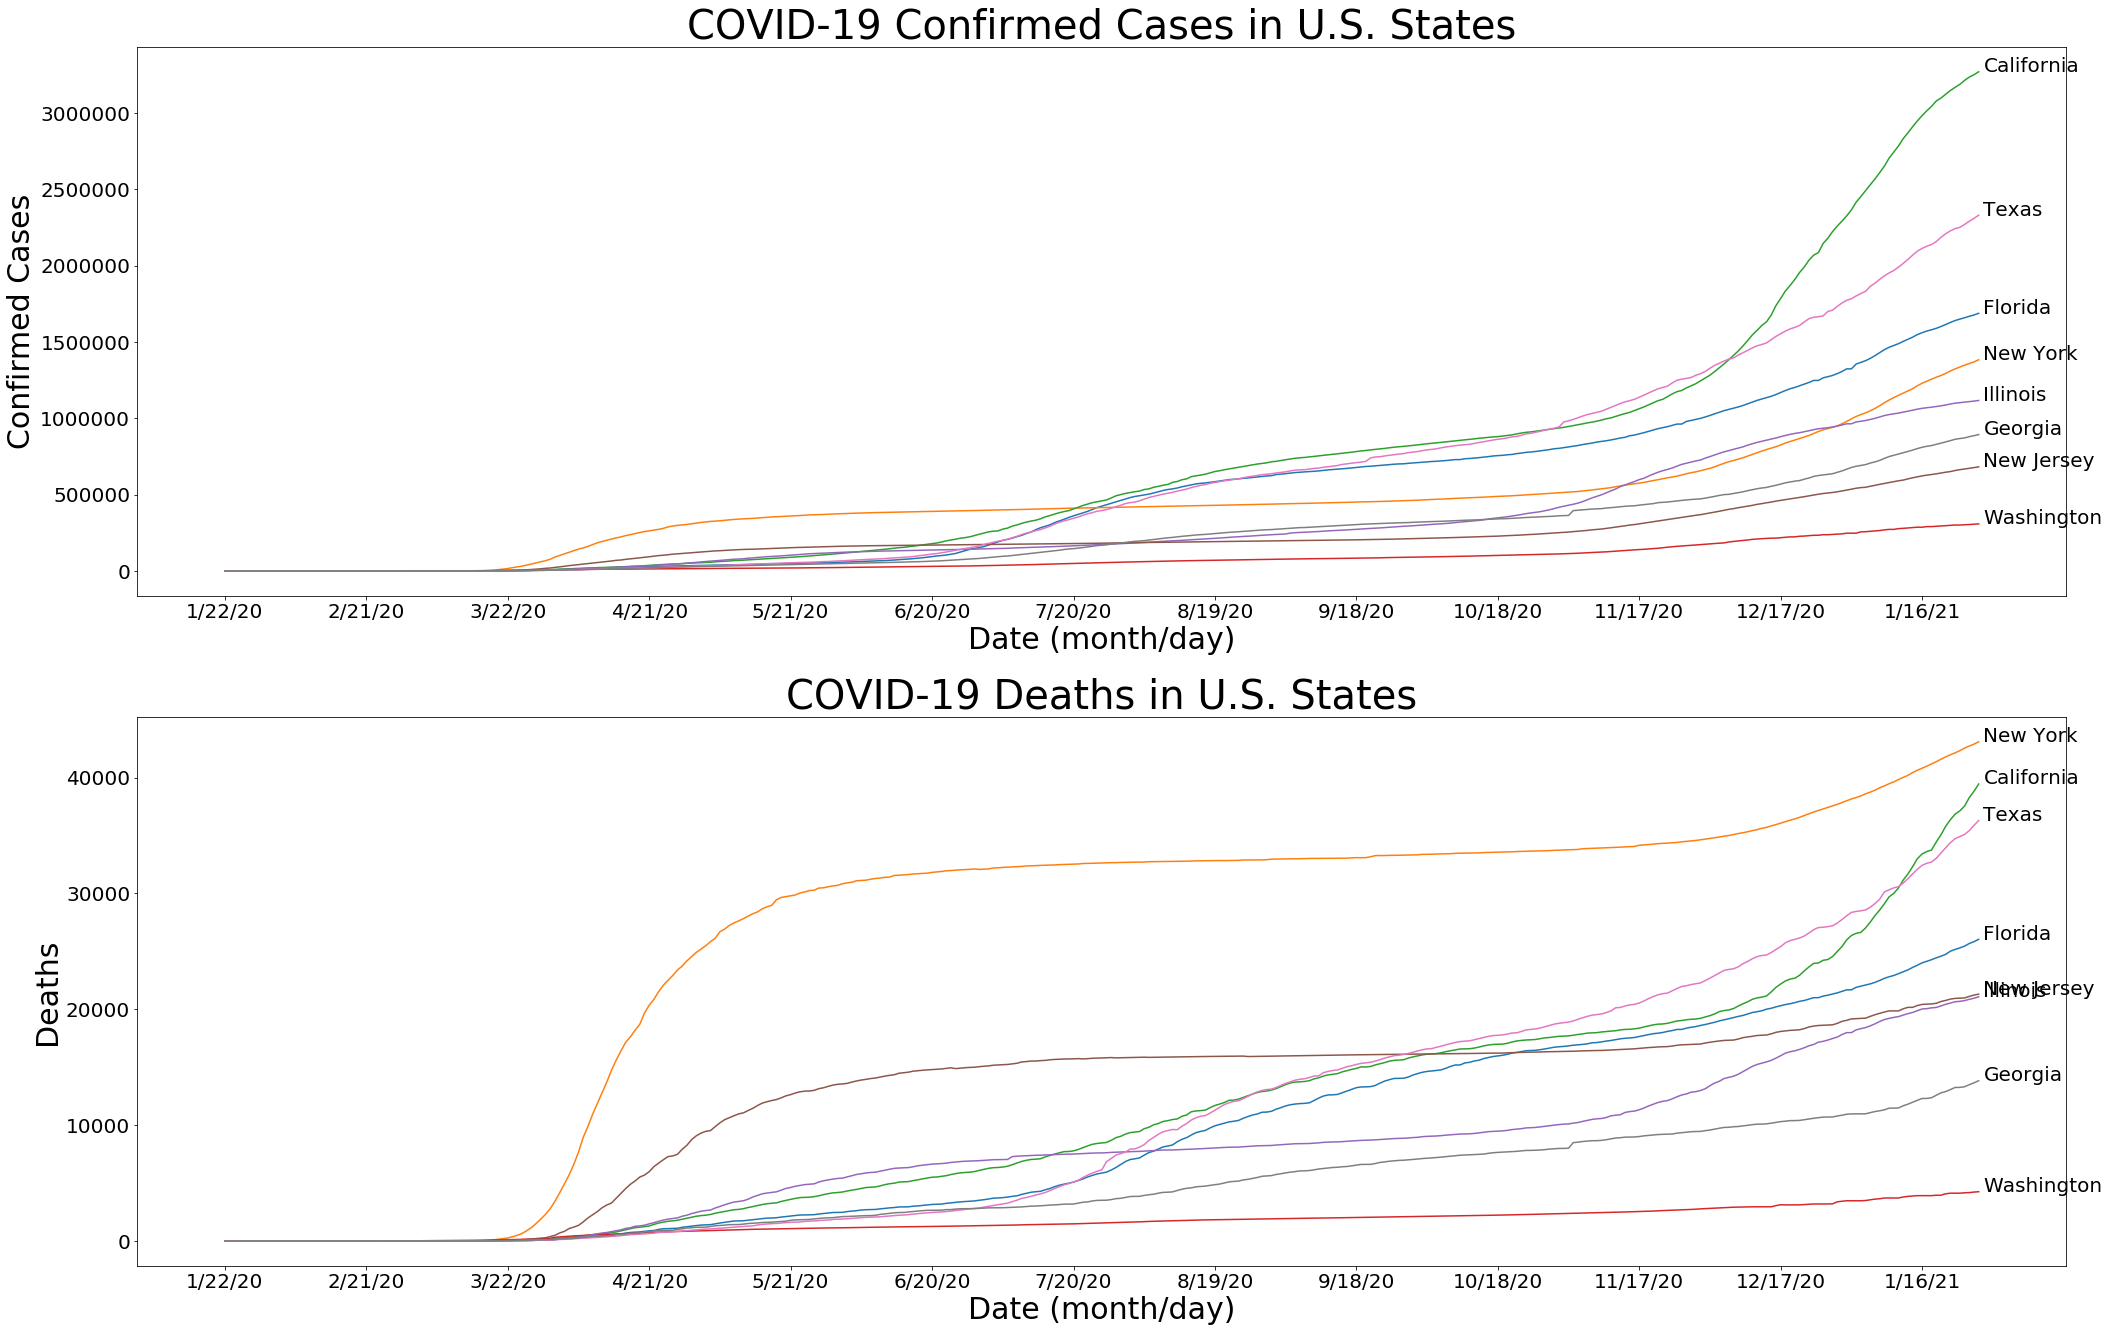

In [10]:
dates =  np.array(timeseries_state_cases_df.columns)[1:]
dates_abbrev = []
for date in dates:
    dates_abbrev.append(date[:-3])
mindate = 0
maxdate = 213

fig, ax = plt.subplots(2, figsize=(30, 20))
fig.tight_layout(pad=10)

states = ["Florida", "New York", "California", "Washington", "Illinois", "New Jersey", "Texas", "Georgia"]

for state in states:
    cases = np.array(timeseries_state_cases_df.set_index('Province_State').loc[state])
    deaths = np.array(timeseries_state_deaths_df.set_index('Province_State').loc[state])

    ax[0].plot(dates, cases)
    ax[0].set_xlabel("Date (month/day)", size=30)
    ax[0].set_ylabel("Confirmed Cases", size=30)
    ax[0].set_xticks(range(0, len(dates), 30))
    ax[0].tick_params(labelsize=20)
    ax[0].set_title("COVID-19 Confirmed Cases in U.S. States", size=40)
    ax[0].annotate(state, (dates_abbrev[-1], cases[-1]), size=20)
    
    ax[1].plot(dates, deaths)
    ax[1].set_xlabel("Date (month/day)", size=30)
    ax[1].set_ylabel("Deaths", size=30)
    ax[1].set_xticks(range(0, len(dates), 30))
    ax[1].tick_params(labelsize=20)
    ax[1].set_title("COVID-19 Deaths in U.S. States", size=40)
    ax[1].annotate(state, (dates_abbrev[-1], deaths[-1]), size=20)

plt.savefig("images/line_graph_us_states.jpg")
plt.show()

Let's create similar line plots tracking the absolute number of several major countries' total confirmed cases and deaths.

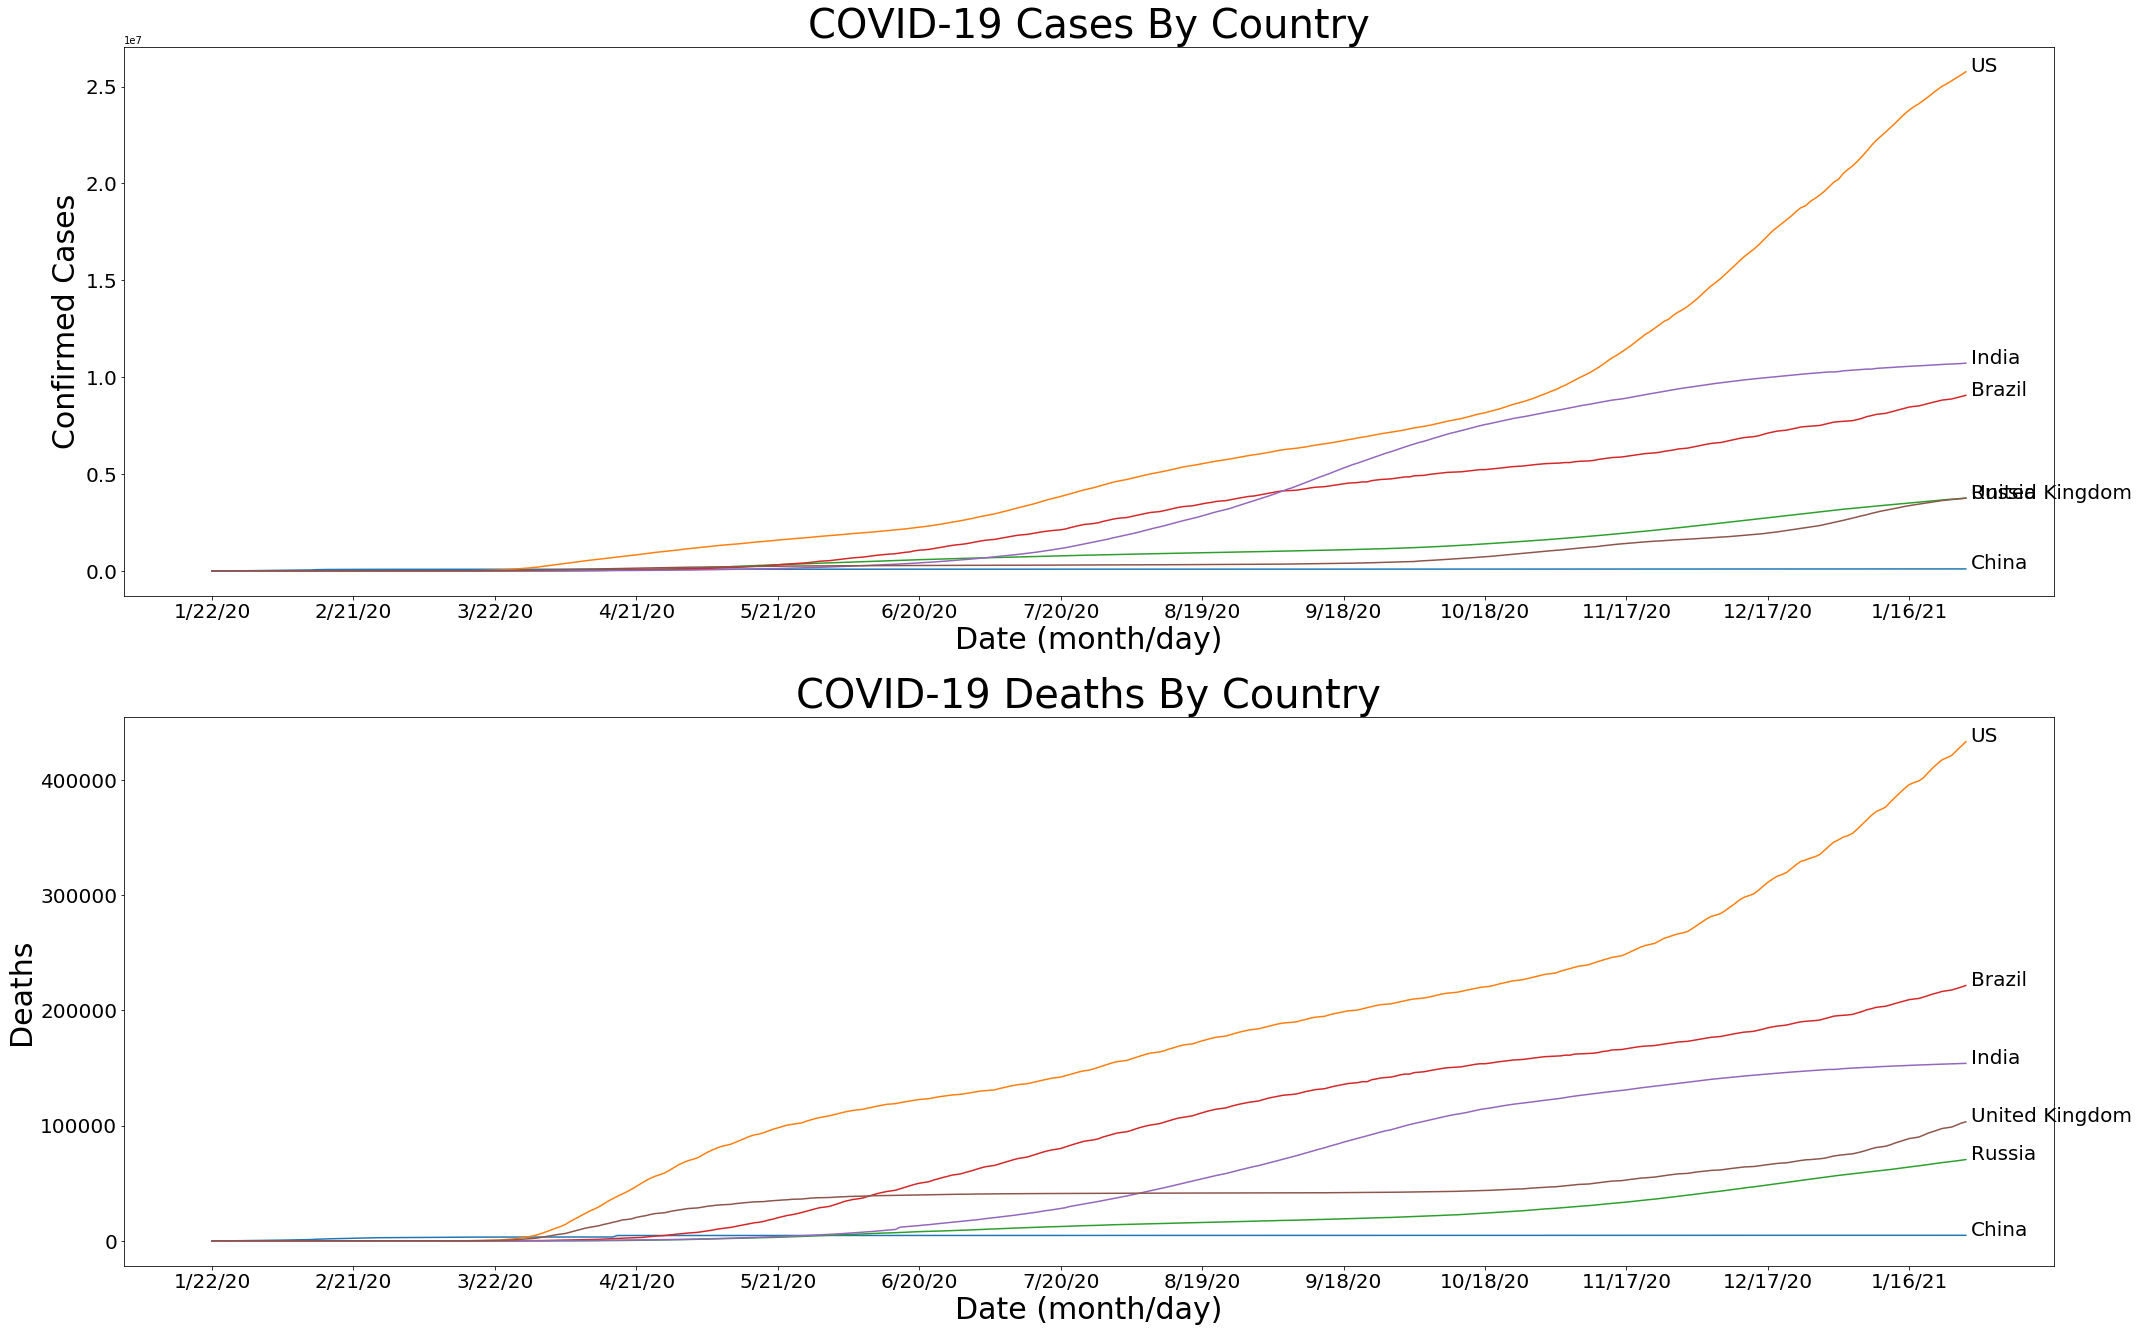

In [11]:
dates =  np.array(timeseries_country_cases_df.columns)[1:]
dates_abbrev = []
for date in dates:
    dates_abbrev.append(date[:-3])

fig, ax = plt.subplots(2, figsize=(30, 20))
fig.tight_layout(pad=10)

countries = ["China", "US", "Russia", "Brazil", "India", "United Kingdom"]

for country in countries:
    
    cases = np.array(timeseries_country_cases_df.set_index('Country').loc[country])
    ax[0].plot(dates, cases)
    ax[0].set_xlabel("Date (month/day)", size=30)
    ax[0].set_ylabel("Confirmed Cases", size=30)
    ax[0].annotate(country, (dates_abbrev[-1], cases[-1]), size=20)
    ax[0].set_xticks(range(0, len(dates), 30))
    ax[0].tick_params(labelsize=20)
    ax[0].set_title("COVID-19 Cases By Country", size=40)
    
    deaths = np.array(timeseries_country_deaths_df.set_index('Country').loc[country])
    ax[1].plot(dates, deaths)
    ax[1].set_xlabel("Date (month/day)", size=30)
    ax[1].set_ylabel("Deaths", size=30)
    ax[1].annotate(country, (dates_abbrev[-1], deaths[-1]), size=20) 
    ax[1].set_xticks(range(0, len(dates), 30))
    ax[1].tick_params(labelsize=20)
    ax[1].set_title("COVID-19 Deaths By Country", size=40)

plt.savefig("images/line_graph_countries.jpg")
plt.show()

Let's create some pie charts to portray confirmed COVID-19 cases by country, month by month, just to put in perspective which countries have been affected the most in the world.

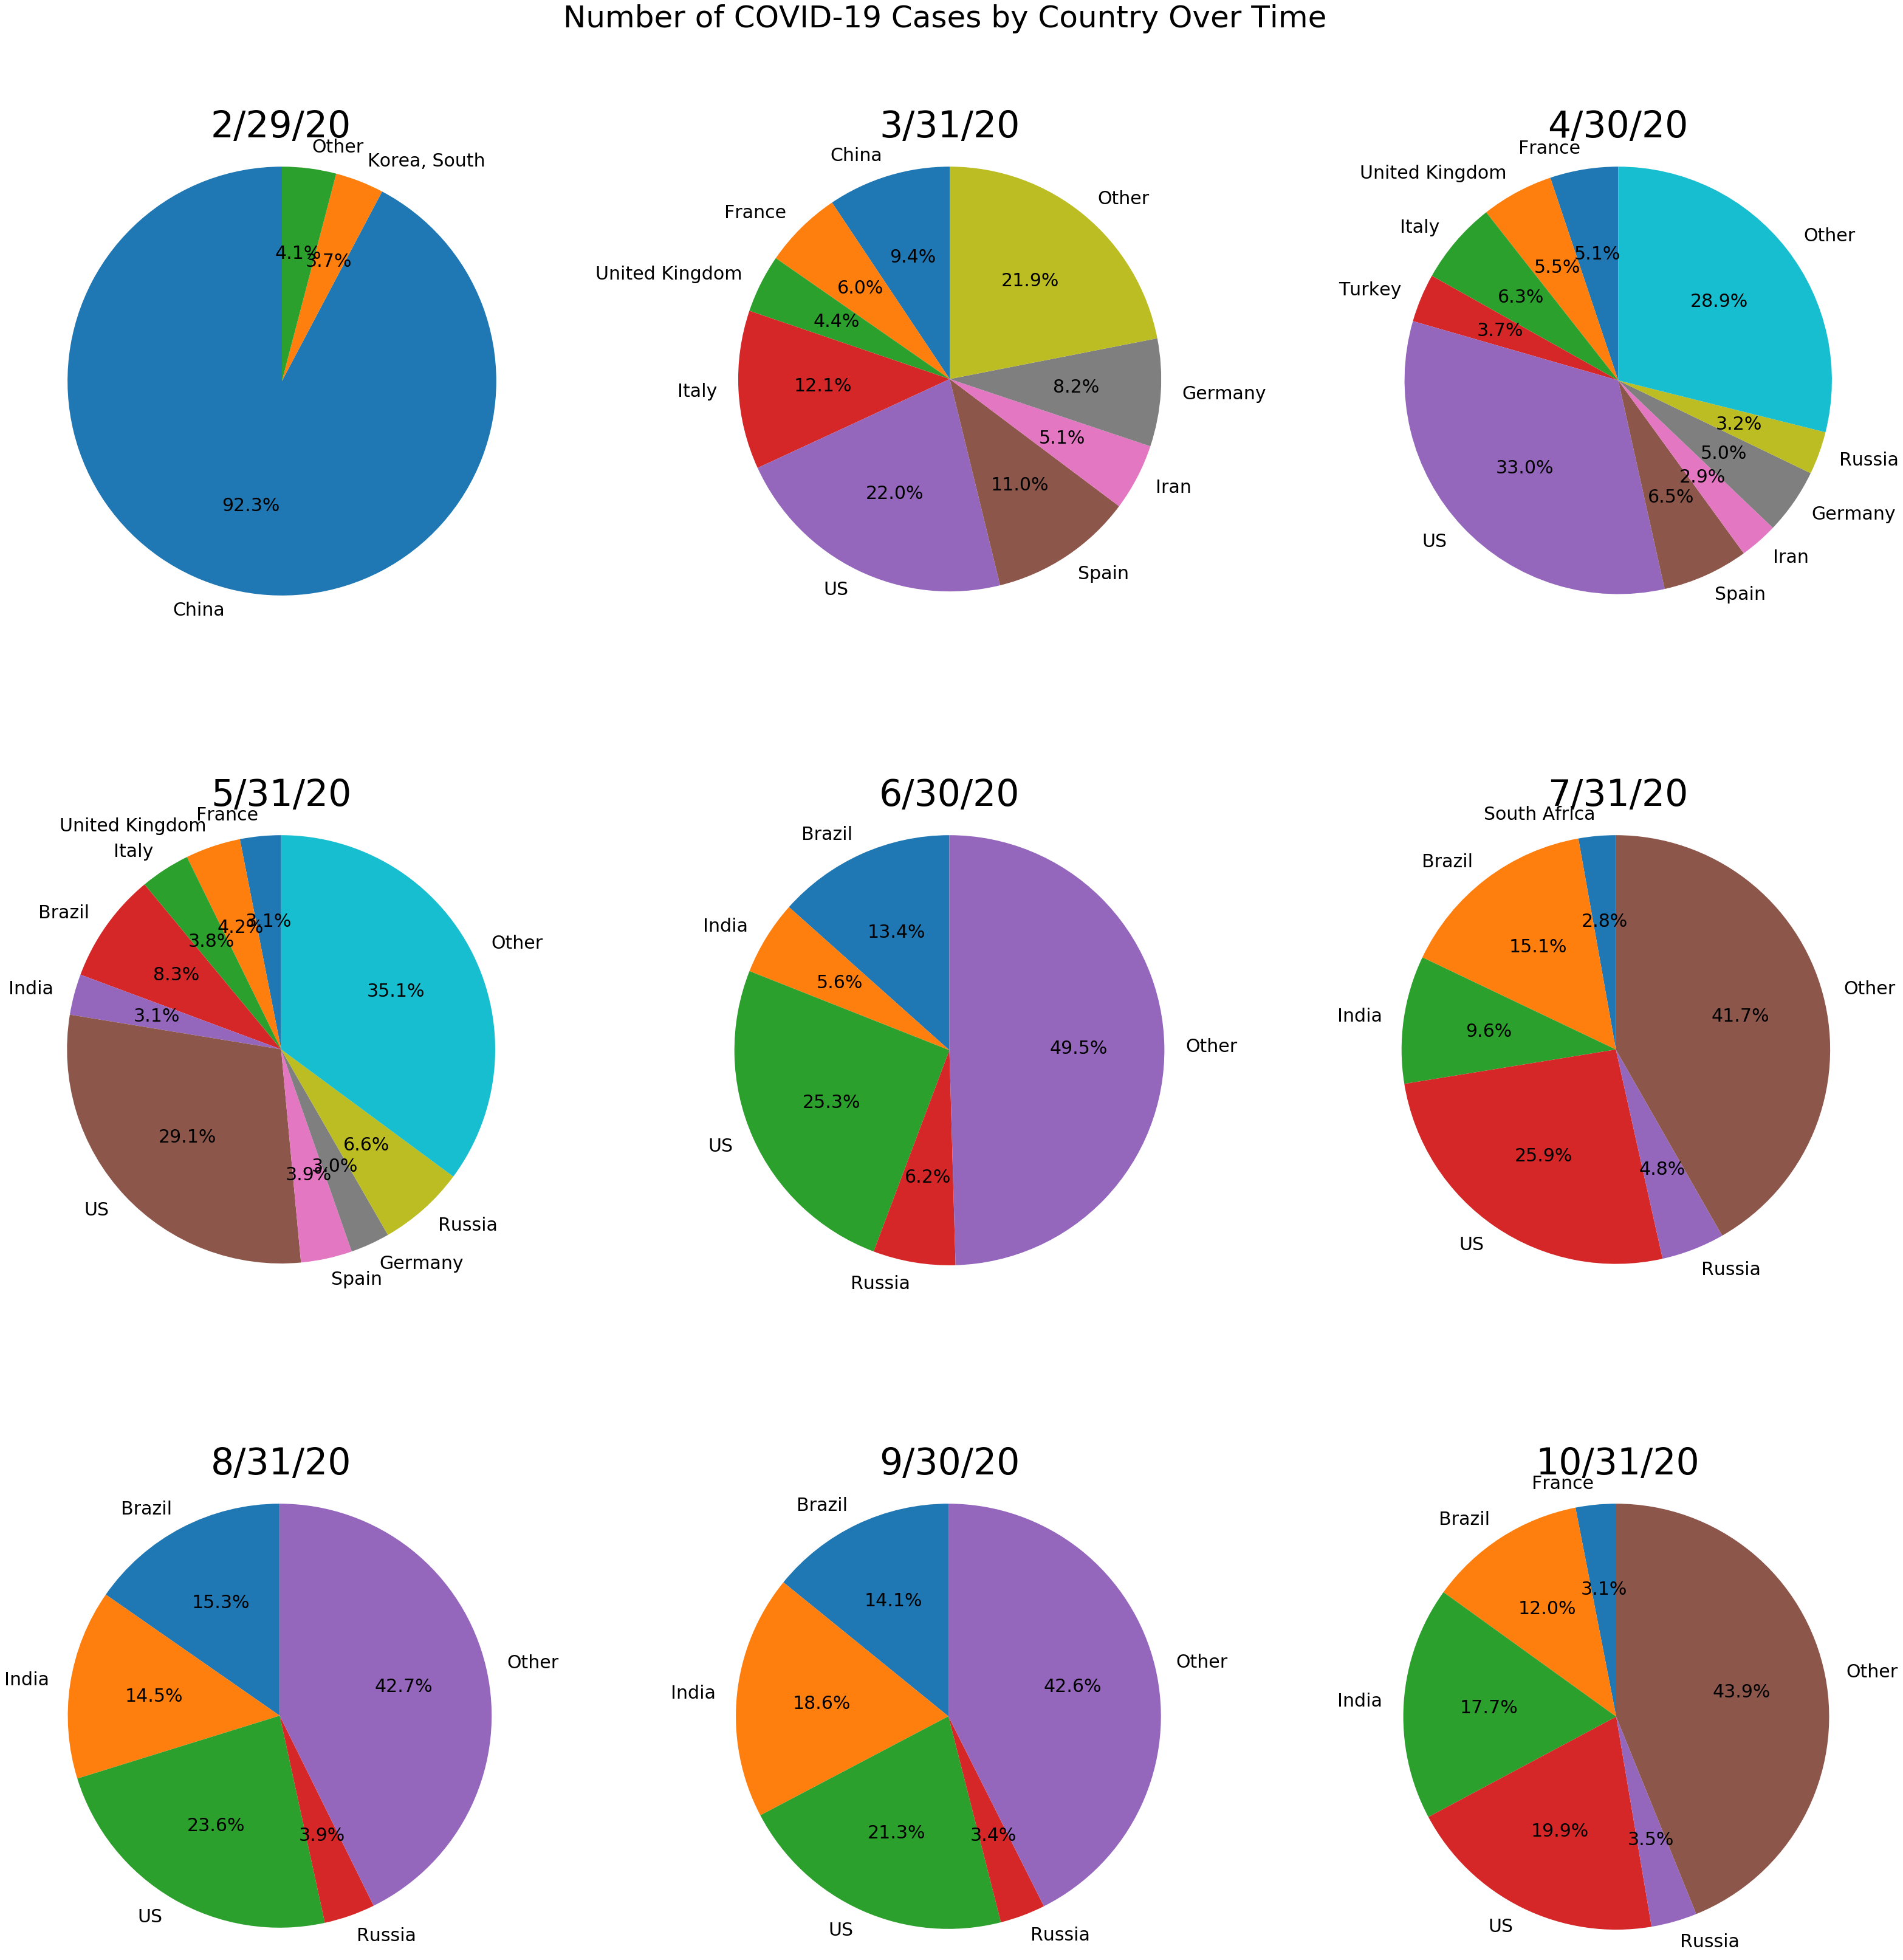

In [12]:
min_proportion = 0.028
days_per_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

fig, ax = plt.subplots(3, 3, figsize=(50, 50))
fig.tight_layout(pad=30)
fig.suptitle("Number of COVID-19 Cases by Country Over Time", size=50)

for i in range(3):
    for j in range(3):
        sum = 0
    
        labels = []
        values = []
        month_index = i*3 + j
        
        total_cases = 0
        for k in range(len(timeseries_country_cases_df)):
            date = str(month_index + 2) + "/" + str(days_per_month[month_index + 1]) + "/20"
            total_cases += timeseries_country_cases_df.loc[k, date]

        other_cases = 0

        for k in range(len(timeseries_country_cases_df)):
            date = str(month_index + 2) + "/" + str(days_per_month[month_index + 1]) + "/20"
            if timeseries_country_cases_df.loc[k,date] / total_cases > min_proportion:
                labels.append(timeseries_country_cases_df.loc[k, "Country"])
                values.append(timeseries_country_cases_df.loc[k, date])
            else:
                other_cases += timeseries_country_cases_df.loc[k, date]
    
        labels.append("Other")
        values.append(other_cases)
        ax[i][j].set_title(str(date), size=60)
        ax[i][j].pie(values, labels=labels, autopct='%1.1f%%', textprops= {'fontsize': 30}, startangle=90)
        ax[i][j].axis('equal')

plt.savefig("images/pie_chart_countries.jpg")
plt.show()

Next, let's create a similar sequence of pie charts for US cases, separated by state/territory.

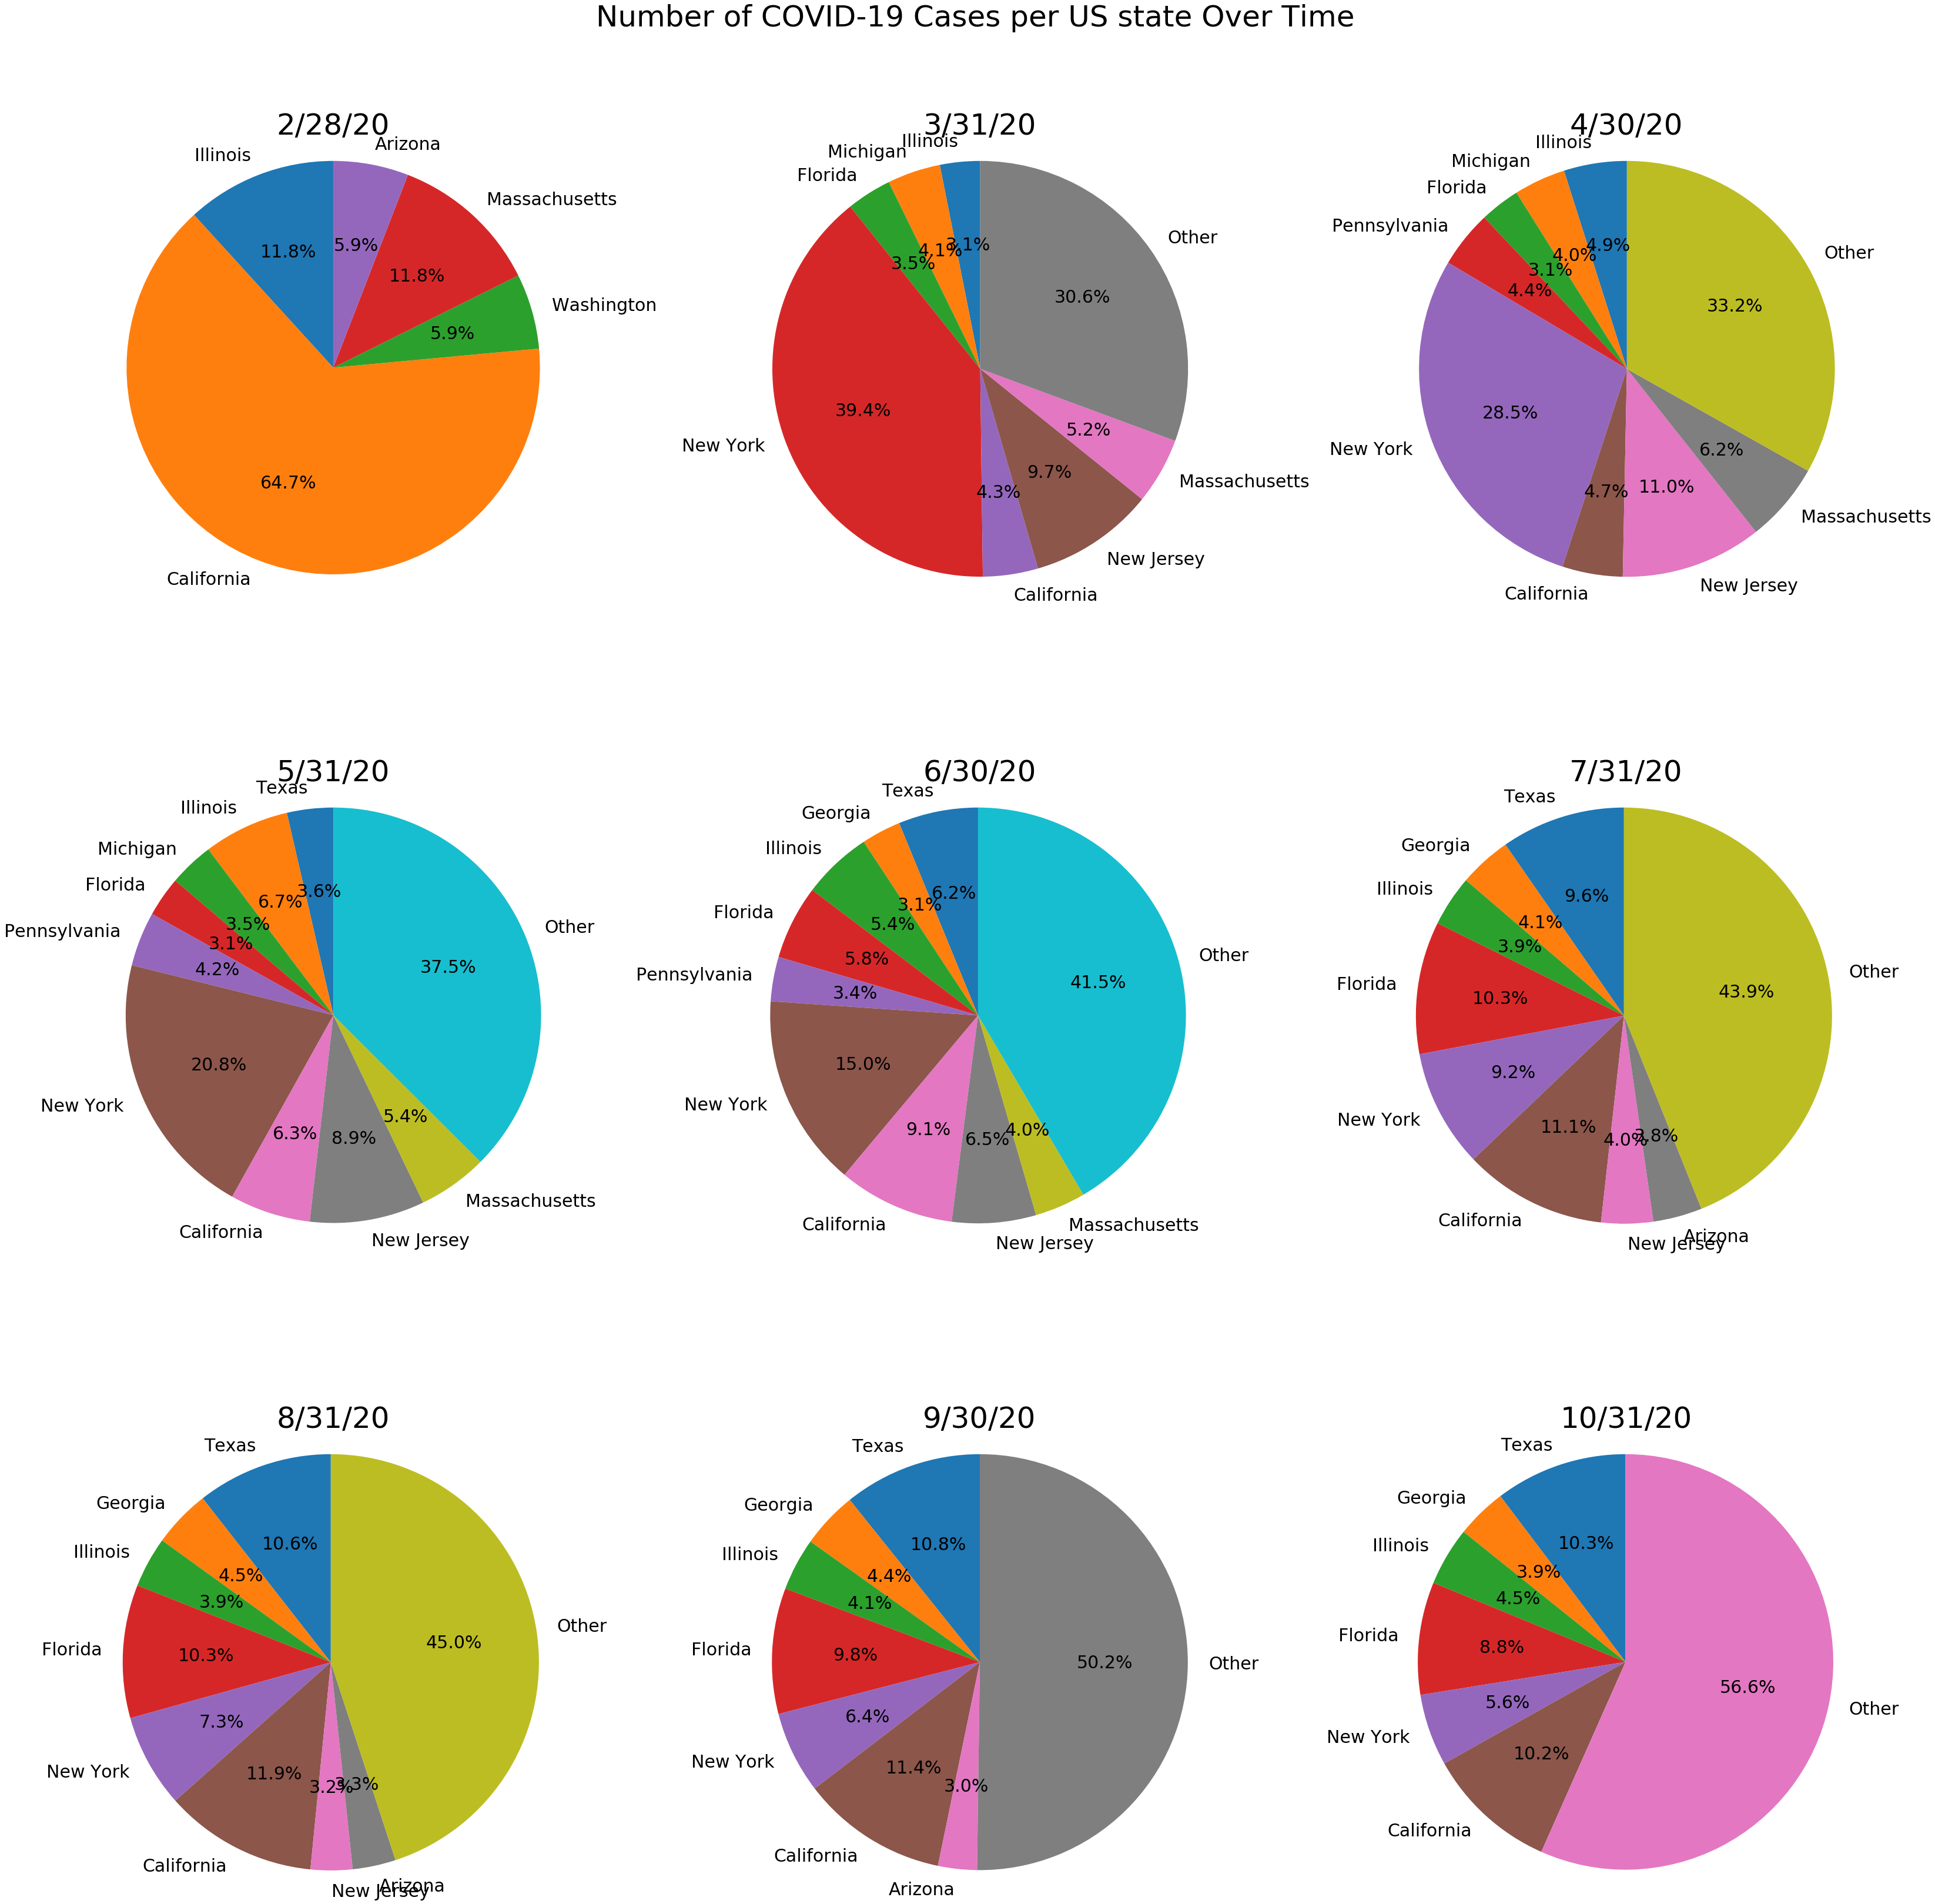

In [13]:
min_proportion = 0.03
days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

fig, ax = plt.subplots(3, 3, figsize=(50, 50))
fig.tight_layout(pad=30)
fig.suptitle("Number of COVID-19 Cases per US state Over Time", size=50)

for i in range(3):
    for j in range(3):
    
        labels = []
        values = []
        month_index = i*3 + j
        
        total_cases = 0
        for k in range(len(timeseries_state_cases_df)):
            date = str(month_index+2) + "/" + str(days_per_month[month_index+1]) + "/20"
            total_cases += timeseries_state_cases_df.loc[k, date]
        
        other_cases = 0
        for k in range(len(timeseries_state_cases_df)):
            if timeseries_state_cases_df.loc[k, date] / total_cases > min_proportion:
                labels.append(timeseries_state_cases_df.loc[k, "Province_State"])
                values.append(timeseries_state_cases_df.loc[k, date])
            else:
                other_cases += timeseries_state_cases_df.loc[k, date]
        
        if other_cases / total_cases > min_proportion:
            labels.append("Other")
            values.append(other_cases)
        
        ax[i][j].set_title(str(date), size=50)
        ax[i][j].pie(values, labels=labels, autopct='%1.1f%%', textprops = {'fontsize': 30}, startangle = 90)
        ax[i][j].axis('equal')

plt.savefig("images/pie_chart_us_states.jpg")
plt.show()